# Flussbilanzanalyse mit U. maydis - Modell : Simulation und Verhältnisanalyse mit Glucose und Co-Feed von Acetat und Formiat zur CO2-negativen/neutralen Prozessgestaltung

In [7]:
from cobra.io import read_sbml_model
model=read_sbml_model('iCL1079.xml')

In [2]:
model.compartments

{'e': 'Extracellular space',
 'c': 'Cytoplasm',
 'm': 'Mitochondrial Lumen',
 'p': 'Mitochondrial Intermembrane Space'}

In [3]:
for reaction in model.metabolites.ac_c.reactions:
    print(reaction.id, reaction, reaction.name)

TRANS-RXNTFS-58-ACET/PROTON//ACET/PROTON.25. TRANS-RXNTFS-58-ACET/PROTON//ACET/PROTON.25.: ac_e + h_e --> ac_c + h_c TRANS-RXNTFS-58-ACET/PROTON//ACET/PROTON.25.
ACETATE--COA-LIGASE-ADP-FORMING-RXN ACETATE--COA-LIGASE-ADP-FORMING-RXN: ac_c + atp_c + coa_c <=> accoa_c + adp_c + pi_c ACETATE--COA-LIGASE-ADP-FORMING-RXN
RXN-14728 RXN-14728: ad_c + h2o_c --> ac_c + nh4_c RXN-14728
METB1 METB1: achms_c + cys__L_c --> ac_c + cyst__L_c + h_c RXN-721
TRANS-RXNTFS-1-ACET//ACET.11. TRANS-RXNTFS-1-ACET//ACET.11.: ac_e --> ac_c TRANS-RXNTFS-1-ACET//ACET.11.
3.1.1.56-RXN 3.1.1.56-RXN: CPD-181_c + h2o_c --> CPD-182_c + ac_c + h_c 3.1.1.56-RXN
3.1.1.69-RXN 3.1.1.69-RXN: CPD-452_c + h2o_c <=> ac_c + gpail_hs_c 3.1.1.69-RXN
3.1.1.47-RXN 3.1.1.47-RXN: Alkyl-acetyl-glycero-ehosphocholines_c + h2o_c --> 1-Alkyl-sn-glycero-3-ehosphocholines_c + ac_c + h_c 3.1.1.47-RXN
AHSERL2 AHSERL2: achms_c + h2s_c --> ac_c + h_c + hcys__L_c ACETYLHOMOSER-CYS-RXN
CYSS_1 CYSS_1: acser_c + h2s_c <=> ac_c + cys__L_c + h_c A

In [4]:
for reaction in model.metabolites.ac_e.reactions:
    print(reaction.id, reaction, reaction.name)

TRANS-RXNTFS-58-ACET/PROTON//ACET/PROTON.25. TRANS-RXNTFS-58-ACET/PROTON//ACET/PROTON.25.: ac_e + h_e --> ac_c + h_c TRANS-RXNTFS-58-ACET/PROTON//ACET/PROTON.25.
TRANS-RXNTFS-8-ACET//ACET.11. TRANS-RXNTFS-8-ACET//ACET.11.: ac_e --> ac_c TRANS-RXNTFS-8-ACET//ACET.11.
EX_ac_e EX_ac_e: ac_e -->  acetate exchange
TRANS-RXNTFS-1-ACET//ACET.11. TRANS-RXNTFS-1-ACET//ACET.11.: ac_e --> ac_c TRANS-RXNTFS-1-ACET//ACET.11.
TRANS-RXNTFS-7-ACET//ACET.11. TRANS-RXNTFS-7-ACET//ACET.11.: ac_e --> ac_c TRANS-RXNTFS-7-ACET//ACET.11.


In [5]:
for reaction in model.metabolites.for_c.reactions:
    print(reaction.id, reaction, reaction.name)

GTPCIn GTPCIn: gtp_c + h2o_c <=> ahdt_c + for_c + h_c GTP-CYCLOHYDRO-I-RXN
RXN66-305 RXN66-305: CPD-4573_c + nadph_c + o2_c --> 44-DIMETHYL-CHOLESTA-812-24-TRIENOL_c + for_c + h2o_c + nadp_c RXN66-305
1.14.13.70-RXN 1.14.13.70-RXN: OBTUSIFOLIOL_c + 2.0 h_c + 3.0 nadph_c + 3.0 o2_c --> for_c + 4.0 h2o_c + mergtrol_c + 3.0 nadp_c 1.14.13.70-RXN
DB4PS DB4PS: ru5p__D_c --> db4p_c + for_c + h_c DIOHBUTANONEPSYN-RXN
S-FORMYLGLUTATHIONE-HYDROLASE-RXN S-FORMYLGLUTATHIONE-HYDROLASE-RXN: Sfglutth_c + h2o_c --> GLUTATHIONE_c + for_c + h_c S-FORMYLGLUTATHIONE-HYDROLASE-RXN
sink_for_c sink_for_c: for_c <=> for_e TRANS-RXN-1
FORMATETHFLIG-RXN FORMATETHFLIG-RXN: atp_c + for_c + thf_c --> 10fthf_c + adp_c + pi_c FORMATETHFLIG-RXN
RXN-11881 RXN-11881: CPD-12852_c + 2.0 h_c + 3.0 nadph_c + 3.0 o2_c --> CPD-12853_c + for_c + 4.0 h2o_c + 3.0 nadp_c RXN-11881
FDH FDH: for_c + nad_c --> co2_c + nadh_c 1.2.1.2-RXN
RXN3O-130 RXN3O-130: 2.0 h_c + lanost_c + 3.0 nadph_c + 3.0 o2_c --> 44-DIMETHYL-CHOLESTA-812-2

In [6]:
for reaction in model.metabolites.for_e.reactions:
    print(reaction.id, reaction, reaction.name)

sink_for_c sink_for_c: for_c <=> for_e TRANS-RXN-1


In [2]:
print(model.objective)

Maximize
1.0*BIOMASS_REACTION - 1.0*BIOMASS_REACTION_reverse_42726


In [3]:
model.optimize()

,fluxes,reduced_costs
ANTPPT,0.015808,-6.938894e-18
ATNS,0.015808,6.716849e-15
TRANS-RXNTFS-54,0.000000,0.000000e+00
TRANS-RXNTFS-55-CPD-12575//CPD-12575.21.,0.000000,-2.469922e-01
TRANS-RXNTFS-55-DTDP-D-GLUCOSE//DTDP-D-GLUCOSE.31.,0.000000,0.000000e+00
...,...,...
DM_cellb_c,0.000000,-1.975938e-01
DM_5aptn_c,0.000000,0.000000e+00
DM_g1p_c,0.000000,-9.879688e-02
DM_glcur_c,0.000000,0.000000e+00


In [4]:
%%time
copy_of_model=model.copy()

Wall time: 1.7 s


In [6]:
for reaction in model.metabolites.co2_c.reactions:
    print(reaction.id, reaction, reaction.name)

RXN-11474 RXN-11474: Malonyl-acp-methyl-ester_c + h_c + malACP_c <=> 3-Ketoglutaryl-ACP-methyl-ester_c + ACP_c + co2_c RXN-11474
RXN0-1134 RXN0-1134: Pyruvate-dehydrogenase-lipoate_c + h_c + pyr_c --> Pyruvate-dehydrogenase-acetylDHlipoyl_c + co2_c RXN0-1134
PEPCKm PEPCKm: gtp_c + oaa_c --> co2_c + gdp_c + pep_c 4.1.1.32-RXN
GLUTACONYL-COA-DECARBOXYLASE-RXN GLUTACONYL-COA-DECARBOXYLASE-RXN: GLUTACONYL-COA_c + h_c <=> b2coa_c + co2_c GLUTACONYL-COA-DECARBOXYLASE-RXN
RXN-9914 RXN-9914: CPD-10663_c + 2.0 h_c + nadh_c + o2_c --> CPD-9152_c + co2_c + h2o_c + nad_c RXN-9914
ORNDC ORNDC: h_c + orn_c --> co2_c + ptrc_c ORNDECARBOX-RXN
3OAS160 3OAS160: h_c + malACP_c + myrsACP_c --> 3opalmACP + ACP_c + co2_c RXN-9654
IGPS_1 IGPS_1: 2cpr5p_c + h_c --> 3ig3p_c + co2_c + h2o_c IGPSYN-RXN
OBDHm OBDHm: 2obut_c + coa_c + nad_c <=> co2_c + nadh_c + ppcoa_c RXN-7790
RXN0-5222 RXN0-5222: cbm_c + 2.0 h_c --> co2_c + nh4_c Cyanase Hydratase Step 2
NNDPRm NNDPRm: 2.0 h_c + prpp_c + quln_c --> co2_c + nicrn

In [7]:
for reaction in model.metabolites.co2_e.reactions:
    print(reaction.id, reaction, reaction.name)

CO2tex CO2tex: co2_e <=> co2_c Carbon Dioxide transport via diffusion (extracellular to cytosol)
EX_co2_e EX_co2_e: co2_e <=>  Carbon Dioxide exchange


In [5]:
from cobra.io import *

In [6]:
model.reactions.EX_co2_e.lower_bound = 0
model.reactions.EX_co2_e.upper_bound = 0

In [7]:
model.optimize()

,fluxes,reduced_costs
ANTPPT,0.015353,0.000000
ATNS,0.015353,0.000000
TRANS-RXNTFS-54,0.000000,0.000000
TRANS-RXNTFS-55-CPD-12575//CPD-12575.21.,0.000000,-0.239894
TRANS-RXNTFS-55-DTDP-D-GLUCOSE//DTDP-D-GLUCOSE.31.,0.000000,0.000000
...,...,...
DM_cellb_c,0.000000,-0.191916
DM_5aptn_c,0.000000,0.000000
DM_g1p_c,0.000000,-0.095958
DM_glcur_c,0.000000,0.000000


In [8]:
model.medium


{'EX_o2_e': 1000.0,
 'EX_nh4_e': 1000.0,
 'EX_cl_e': 1000.0,
 'EX_k_e': 1000.0,
 'EX_pi_e': 1000.0,
 'EX_mg2_e': 1000.0,
 'EX_so4_e': 1000.0,
 'EX_h2o_e': 1000.0,
 'EX_zn2_e': 1000.0,
 'EX_fe2_e': 1000.0,
 'EX_cobalt2_e': 1000.0,
 'EX_copper2_e': 1000.0,
 'EX_na1_e': 1000.0,
 'EX_ca2_e': 1000.0,
 'EX_btn_e': 1000.0,
 'EX_pnto_R_e': 1000.0,
 'EX_thm_e': 1000.0,
 'EX_pydx_e': 1000.0,
 'EX_4abz_e': 1000.0,
 'EX_glc__D_e': 10.0}

In [9]:
solution=model.optimize()
print(solution.fluxes['BIOMASS_REACTION'])

0.47978889288712934


In [9]:
medium=model.medium
with model:
    medium['EX_glc__D_e']=10
    medium['EX_ac_e']=10
    model.medium=medium
    solution=model.optimize()
    print(solution.fluxes['BIOMASS_REACTION'])

0.5650355726837635


In [3]:
Glucose_list = [5,7,9,11,13,15]
Acetate_list = [0,2,4,6,8,10]
medium_list=[[x,y] for x in Glucose_list for y in Acetate_list]
print(medium_list)

[[5, 0], [5, 2], [5, 4], [5, 6], [5, 8], [5, 10], [7, 0], [7, 2], [7, 4], [7, 6], [7, 8], [7, 10], [9, 0], [9, 2], [9, 4], [9, 6], [9, 8], [9, 10], [11, 0], [11, 2], [11, 4], [11, 6], [11, 8], [11, 10], [13, 0], [13, 2], [13, 4], [13, 6], [13, 8], [13, 10], [15, 0], [15, 2], [15, 4], [15, 6], [15, 8], [15, 10]]


In [64]:
for z in medium_list:
    x=z[0]
    y=z[1]
    with model:
        medium['EX_glc__D_e']=x
        medium['EX_ac_e']=y
        model.medium=medium
        solution=model.optimize()
        BIOMASS_list=solution.fluxes['BIOMASS_REACTION']
        print(BIOMASS_list)    

0.24699219084790186
0.26947850389533345
0.2781713588596992
0.28686421382406474
0.28900393493307575
0.28900393493307575
0.345789067187063
0.3704882862718533
0.38248561843208656
0.3911784733964522
0.39987132836081746
0.4046055089063064
0.44458594352622327
0.4692851626110133
0.4867998780044733
0.4954927329688386
0.5041855879332041
0.5128784428975695
0.5433828198653833
0.5680820389501735
0.5911141375768602
0.5998069925412256
0.608499847505591
0.6171927024699569
0.642179696204544
0.6668789152893342
0.6915781343741242
0.7041212521136131
0.7128141070779781
0.7215069620423438
0.7409765725437045
0.765675791628495
0.7903750107132851
0.808435511686
0.8171283666503653
0.8258212216147297


In [17]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

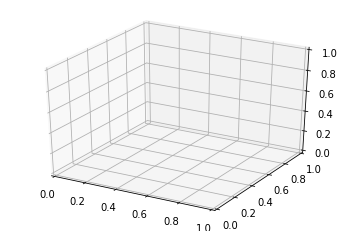

In [54]:
fig = plt.figure()
ax = plt.axes(projection='3d')


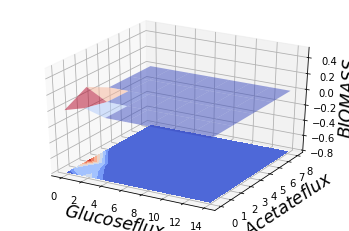

In [71]:
from mpl_toolkits.mplot3d import Axes3D
   ...: x, y = np.mgrid[0:15:2, 0:10:2]
   ...: z = (x**2+y**3)*np.exp(-x**2-y**2)
   ...: cmap = 'coolwarm'
   ...:
   ...: fig = plt.figure()
   ...: ax = fig.gca(projection='3d')
   ...: ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap=cmap, alpha=0.5)
   ...: cset = ax.contourf(x, y, z, zdir='z', offset=-0.8, cmap=cmap)
   ...: ax.set_xlabel('$Glucose flux$', size='xx-large')
   ...: ax.set_ylabel('$Acetate flux$', size='xx-large')
   ...: ax.set_zlabel('$BIOMASS$', size='xx-large')
   ...: ax.set_zlim(-0.8, 0.5)
   ...:
   ...: plt.draw()

AttributeError: 'list' object has no attribute 'ndim'

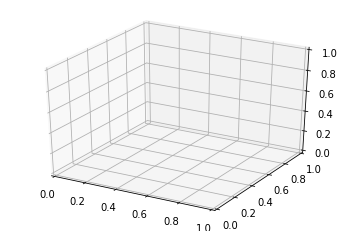

In [72]:
from mpl_toolkits.mplot3d import Axes3D
x, y = np.mgrid[0:15:20j, 0:10:20j]
for z in medium_list:
    x=z[0]
    y=z[1]
    with model:
        medium['EX_glc__D_e']=x
        medium['EX_ac_e']=y
        model.medium=medium
        solution=model.optimize()
        BIOMASS_list=solution.fluxes['BIOMASS_REACTION']
cmap = 'coolwarm'
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap=cmap, alpha=0.5)
cset = ax.contourf(x, y, z, zdir='z', offset=-0.8, cmap=cmap)
ax.set_xlabel('$x$', size='xx-large')
ax.set_ylabel('$y$', size='xx-large')
ax.set_zlabel('$z$', size='xx-large')
ax.set_zlim(-0.8, 0.5)

plt.draw()